In [1]:
year=2019
month=6

In [2]:
import pandas as pd
import sys
sys.path.append('../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [3]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [4]:
conn=db.get_conn()
cities = "('北京','上海','深圳','杭州','广州','南京','成都','东莞','西安','武汉','天津','长沙','宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨')"
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and YEAR(publish_date)={year} and MONTH(publish_date)={month} and city in {cities}", con=conn)
conn.close()

In [5]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [6]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [7]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}

translate_dict={}


# 程序员工资

In [8]:
data_city=get_sub_stats_by_col(data,'city')
data_city.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
1,北京,17613,3750,15000,45000,23700,10.07%
2,上海,16410,5250,15000,37500,42447,18.03%
6,深圳,16145,5250,14500,37500,34353,14.59%
3,杭州,15164,3500,12500,35000,12847,5.46%
4,广州,13385,3750,12500,30000,26976,11.46%
9,南京,13282,3750,12500,29166,13621,5.79%
7,成都,11886,3000,11500,27500,10533,4.47%
16,东莞,11725,3750,11500,24000,2492,1.06%
0,武汉,11281,4500,10416,25000,13495,5.73%
13,长沙,11053,3750,10500,22500,5857,2.49%


In [9]:
def describe(data_city, career):
    
    for index, row in data_city.iterrows():
        print(f"{year}年{month}月{row[0]}招收{career}{row[5]}人。{year}年{month}月{row[0]}{career}平均工资{row[1]:.0f}元，工资中位数{row[3]:.0f}元，其中95%的人的工资介于{row[2]:.0f}元到{row[4]:.0f}元。\r\n")


In [10]:
describe(data_city,'程序员')

2019年6月北京招收程序员23700人。2019年6月北京程序员平均工资17613元，工资中位数15000元，其中95%的人的工资介于3750元到45000元。

2019年6月上海招收程序员42447人。2019年6月上海程序员平均工资16410元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年6月深圳招收程序员34353人。2019年6月深圳程序员平均工资16145元，工资中位数14500元，其中95%的人的工资介于5250元到37500元。

2019年6月杭州招收程序员12847人。2019年6月杭州程序员平均工资15164元，工资中位数12500元，其中95%的人的工资介于3500元到35000元。

2019年6月广州招收程序员26976人。2019年6月广州程序员平均工资13385元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2019年6月南京招收程序员13621人。2019年6月南京程序员平均工资13282元，工资中位数12500元，其中95%的人的工资介于3750元到29166元。

2019年6月成都招收程序员10533人。2019年6月成都程序员平均工资11886元，工资中位数11500元，其中95%的人的工资介于3000元到27500元。

2019年6月东莞招收程序员2492人。2019年6月东莞程序员平均工资11725元，工资中位数11500元，其中95%的人的工资介于3750元到24000元。

2019年6月武汉招收程序员13495人。2019年6月武汉程序员平均工资11281元，工资中位数10416元，其中95%的人的工资介于4500元到25000元。

2019年6月长沙招收程序员5857人。2019年6月长沙程序员平均工资11053元，工资中位数10500元，其中95%的人的工资介于3750元到22500元。

2019年6月西安招收程序员6462人。2019年6月西安程序员平均工资10819元，工资中位数10000元，其中95%的人的工资介于4500元到22500元。

2019年6月天津招收程序员2185人。2019年6月天津程序员平均工资10653元，工资中位数9000元，其中95%的人的工资介于4500元到22500元。

2019年6月宁波

In [11]:
data_location = pd.read_csv('city_locations.csv')
data_location=data_location.set_index('city')

In [12]:
from mpl_toolkits.basemap import Basemap

In [13]:
def draw_map(data_city,headcount_scale, title):


    #cities = []
    scale = 5

    locations = [(116.407526, 39.90403),(120, 30)]
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.figsize'] = [13, 13]
    #plt.figure(figsize = (10,5))
    fig, ax = plt.subplots()
    fig.title=title
    fig.figsize=(10,5)
    fig.dpi=80
    cn_map= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
               projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影

    # load the shapefile, use the name 'states'
    cn_map.readshapefile(r'D:/data/basemap/gadm36_CHN_shp/gadm36_CHN_1', name='china', drawbounds=True, color='gray')
    cn_map.readshapefile(r'D:/data/basemap/gadm36_TWN_shp/gadm36_TWN_1', name='taiwan', drawbounds=True, color='gray')
    #geolocator = Nominatim(user_agent="my-application")



    salary_min=data_city.salary_mean.min()
    salary_max=data_city.salary_mean.max()
    salary_middle = (salary_min+salary_max)/2
    salary_scale=salary_max-salary_min

    for index, row in data_city.iterrows():
        city=row[0]
        
        longitude = data_location.loc[city,'longitude']
        latitude = data_location.loc[city,'latitude']
        salary=row[1]
        headcount=row[5]
        #color
        color_red=0
        color_green=0
        color_blue=0
        if salary>salary_middle:
            color_red = 255 #int((salary - salary_middle) / (salary_scale/2)*255)
            color_green = int((salary_max - salary) / (salary_scale/2)*255)
        else:
            color_blue = int((salary_middle - salary) / (salary_scale/2)*255)
            color_green = int((salary - salary_min) / (salary_scale/2)*255)
            color_red = int((salary - salary_min) / (salary_scale/2)*255)

        color = '#{:02x}{:02x}{:02x}'.format(color_red,color_green,color_blue)


        x, y = cn_map(longitude,latitude)
        cn_map.plot(x,y,marker='o',color=color,markersize=int(math.sqrt(headcount/headcount_scale))+8)
        #ax.annotate(city, (x,y), xytext=(5, 5), textcoords='offset points', fontsize=15)
        #"{}{:.0f}".format(city_cn, salary)
        #ax.text(x+5, y+5,city , fontweight='bold', fontsize=int(headcount/2500+12))
        fontsize=int(math.sqrt(headcount/headcount_scale))+13
        if city == '杭州':
            x=x-400000
            y=y+10000
        elif city=='广州':
            x=x-400000
            y=y+10000
        elif city=='合肥':
            x=x-300000
            y=y+10000
        elif city=='深圳':
            y=y-100000
        elif city=='南京':
            x=x-100000
        elif city=='天津':
            y=y-50000
        elif city=='上海':
            x=x+50000
        elif city=='武汉':
            y=y-50000

        ax.text(x, y, "{}{:.0f}k".format(city, np.round(salary/1000)), fontweight='bold', fontsize=fontsize, bbox={'facecolor':color, 'alpha':0.3, 'pad':0})
    ax.text(2053805, 1077845, "https://github.com/juwikuang/china_job_survey".format(city, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(205805, 107845, "https://github.com/juwikuang/china_job_survey".format(city, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(805805, 4007845, title.format(city, np.round(salary/1000)), fontweight='bold',color='#111111', fontsize=25)    
    ax.text(805805, 3807845, "（城市大小代表招聘数量，颜色代表工资，红色最高，黄色次之，蓝最少）", fontweight='bold',color='#111111', fontsize=13)    
    #cn_map.drawcoastlines() #绘制海岸线
    #cn_map.drawcountries(linewidth=1.5) #绘制国家边界线
    plt.show()


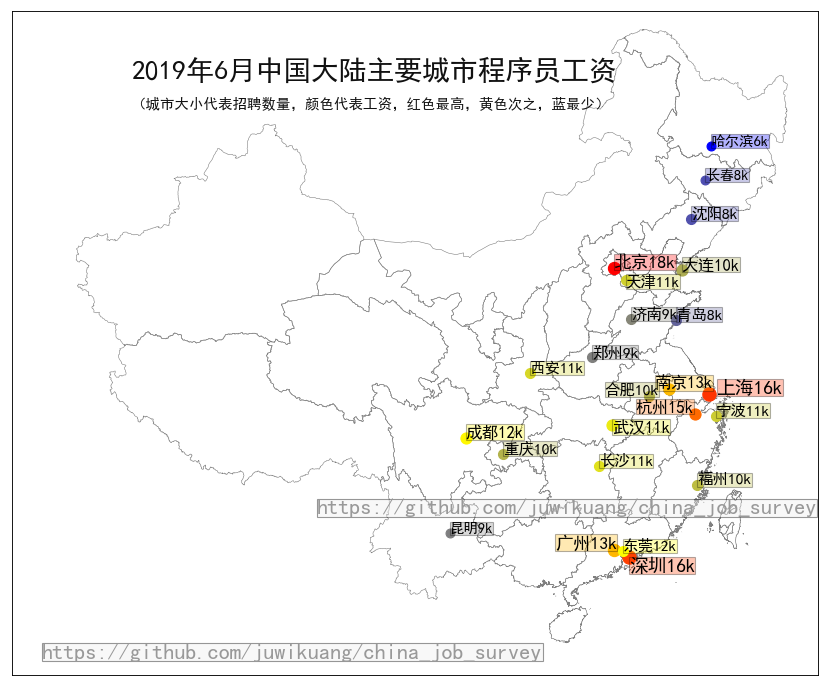

In [14]:
draw_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 算法工程师

In [15]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'city')
data_city_algorithm.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
0,北京,25747,5250,22500,65000,2856,15.05%
2,上海,23360,6500,22500,49125,3954,20.83%
6,深圳,22337,7000,21000,45000,2943,15.51%
4,杭州,19994,3750,17500,45833,1508,7.95%
3,广州,19250,4732,17500,45000,1762,9.28%
15,宁波,18106,7000,14750,35000,93,0.49%
11,南京,17936,7496,17500,35000,1169,6.16%
18,合肥,15712,2780,15000,39514,282,1.49%
10,成都,15352,5045,14000,30594,845,4.45%
12,武汉,15199,3750,15000,27500,1047,5.52%


In [16]:
describe(data_city_algorithm,'算法工程师')

2019年6月北京招收算法工程师2856人。2019年6月北京算法工程师平均工资25747元，工资中位数22500元，其中95%的人的工资介于5250元到65000元。

2019年6月上海招收算法工程师3954人。2019年6月上海算法工程师平均工资23360元，工资中位数22500元，其中95%的人的工资介于6500元到49125元。

2019年6月深圳招收算法工程师2943人。2019年6月深圳算法工程师平均工资22337元，工资中位数21000元，其中95%的人的工资介于7000元到45000元。

2019年6月杭州招收算法工程师1508人。2019年6月杭州算法工程师平均工资19994元，工资中位数17500元，其中95%的人的工资介于3750元到45833元。

2019年6月广州招收算法工程师1762人。2019年6月广州算法工程师平均工资19250元，工资中位数17500元，其中95%的人的工资介于4732元到45000元。

2019年6月宁波招收算法工程师93人。2019年6月宁波算法工程师平均工资18106元，工资中位数14750元，其中95%的人的工资介于7000元到35000元。

2019年6月南京招收算法工程师1169人。2019年6月南京算法工程师平均工资17936元，工资中位数17500元，其中95%的人的工资介于7496元到35000元。

2019年6月合肥招收算法工程师282人。2019年6月合肥算法工程师平均工资15712元，工资中位数15000元，其中95%的人的工资介于2780元到39514元。

2019年6月成都招收算法工程师845人。2019年6月成都算法工程师平均工资15352元，工资中位数14000元，其中95%的人的工资介于5045元到30594元。

2019年6月武汉招收算法工程师1047人。2019年6月武汉算法工程师平均工资15199元，工资中位数15000元，其中95%的人的工资介于3750元到27500元。

2019年6月长沙招收算法工程师393人。2019年6月长沙算法工程师平均工资14921元，工资中位数12500元，其中95%的人的工资介于7000元到36125元。

2019年6月西安招收算法工程师543人。2019年6月西安算法工程师平均工资14439元，工资中位数12942元，其

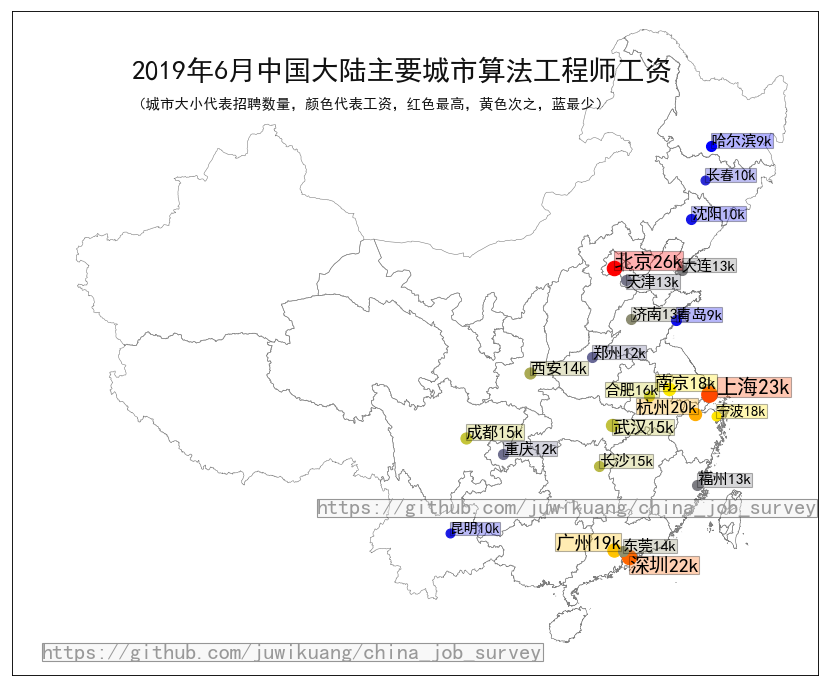

In [17]:
draw_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市算法工程师工资')

# 系统架构师

In [18]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'city')
data_city_architect.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10,北京,30629,5750,30000,60000,1220,14.57%
8,深圳,26598,7000,25000,60000,1086,12.97%
4,上海,25482,7000,22500,50000,1718,20.51%
6,杭州,23104,3516,24000,40000,485,5.79%
20,天津,23072,5440,18333,67050,73,0.87%
2,南京,20461,4778,20000,35885,371,4.43%
3,广州,19655,5033,20000,41722,1276,15.23%
11,东莞,18936,6983,20000,35312,119,1.42%
9,成都,18869,5250,17500,44458,286,3.41%
0,大连,18789,9000,17500,32166,102,1.22%


In [19]:
describe(data_city_architect,'系统架构师')

2019年6月北京招收系统架构师1220人。2019年6月北京系统架构师平均工资30629元，工资中位数30000元，其中95%的人的工资介于5750元到60000元。

2019年6月深圳招收系统架构师1086人。2019年6月深圳系统架构师平均工资26598元，工资中位数25000元，其中95%的人的工资介于7000元到60000元。

2019年6月上海招收系统架构师1718人。2019年6月上海系统架构师平均工资25482元，工资中位数22500元，其中95%的人的工资介于7000元到50000元。

2019年6月杭州招收系统架构师485人。2019年6月杭州系统架构师平均工资23104元，工资中位数24000元，其中95%的人的工资介于3516元到40000元。

2019年6月天津招收系统架构师73人。2019年6月天津系统架构师平均工资23072元，工资中位数18333元，其中95%的人的工资介于5440元到67050元。

2019年6月南京招收系统架构师371人。2019年6月南京系统架构师平均工资20461元，工资中位数20000元，其中95%的人的工资介于4778元到35885元。

2019年6月广州招收系统架构师1276人。2019年6月广州系统架构师平均工资19655元，工资中位数20000元，其中95%的人的工资介于5033元到41722元。

2019年6月东莞招收系统架构师119人。2019年6月东莞系统架构师平均工资18936元，工资中位数20000元，其中95%的人的工资介于6983元到35312元。

2019年6月成都招收系统架构师286人。2019年6月成都系统架构师平均工资18869元，工资中位数17500元，其中95%的人的工资介于5250元到44458元。

2019年6月大连招收系统架构师102人。2019年6月大连系统架构师平均工资18789元，工资中位数17500元，其中95%的人的工资介于9000元到32166元。

2019年6月西安招收系统架构师185人。2019年6月西安系统架构师平均工资16818元，工资中位数17500元，其中95%的人的工资介于7607元到28229元。

2019年6月武汉招收系统架构师398人。2019年6月武汉系统架构师平均工资16263元，工资中位数15000元，其中95

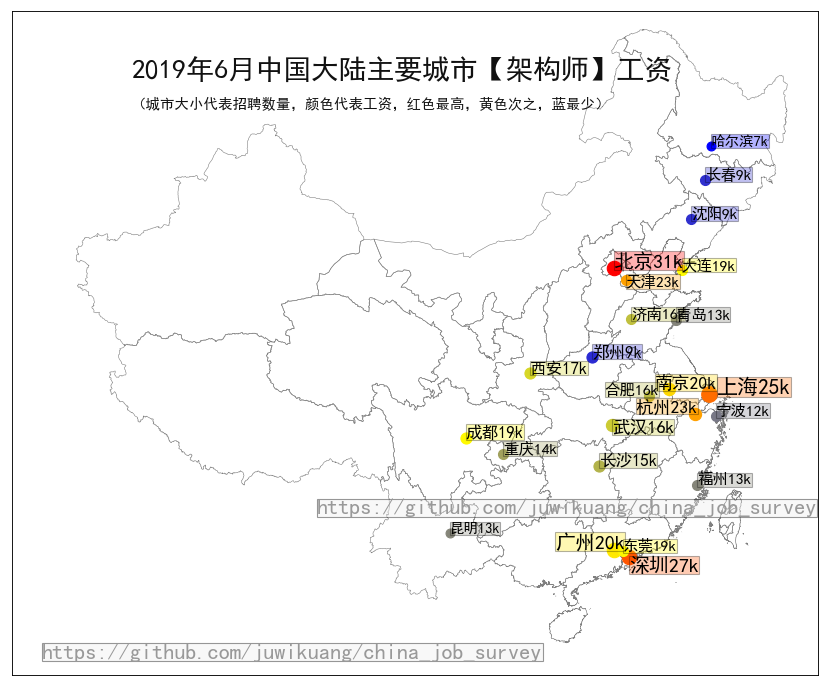

In [20]:
draw_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [21]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'city')
data_bio.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
0,北京,12500,12500,12500,12500,2,8.70%
3,杭州,12000,11500,12000,12500,2,8.70%
5,长春,11500,11500,11500,11500,2,8.70%
1,广州,11375,7000,11375,14000,8,34.78%
4,上海,9800,8000,9800,12500,5,21.74%
2,武汉,9000,9000,9000,9000,1,4.35%
6,南京,9000,9000,9000,9000,3,13.04%


In [22]:
describe(data_bio,'生物信息工程师')

2019年6月北京招收生物信息工程师2人。2019年6月北京生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2019年6月杭州招收生物信息工程师2人。2019年6月杭州生物信息工程师平均工资12000元，工资中位数12000元，其中95%的人的工资介于11500元到12500元。

2019年6月长春招收生物信息工程师2人。2019年6月长春生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年6月广州招收生物信息工程师8人。2019年6月广州生物信息工程师平均工资11375元，工资中位数11375元，其中95%的人的工资介于7000元到14000元。

2019年6月上海招收生物信息工程师5人。2019年6月上海生物信息工程师平均工资9800元，工资中位数9800元，其中95%的人的工资介于8000元到12500元。

2019年6月武汉招收生物信息工程师1人。2019年6月武汉生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年6月南京招收生物信息工程师3人。2019年6月南京生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。



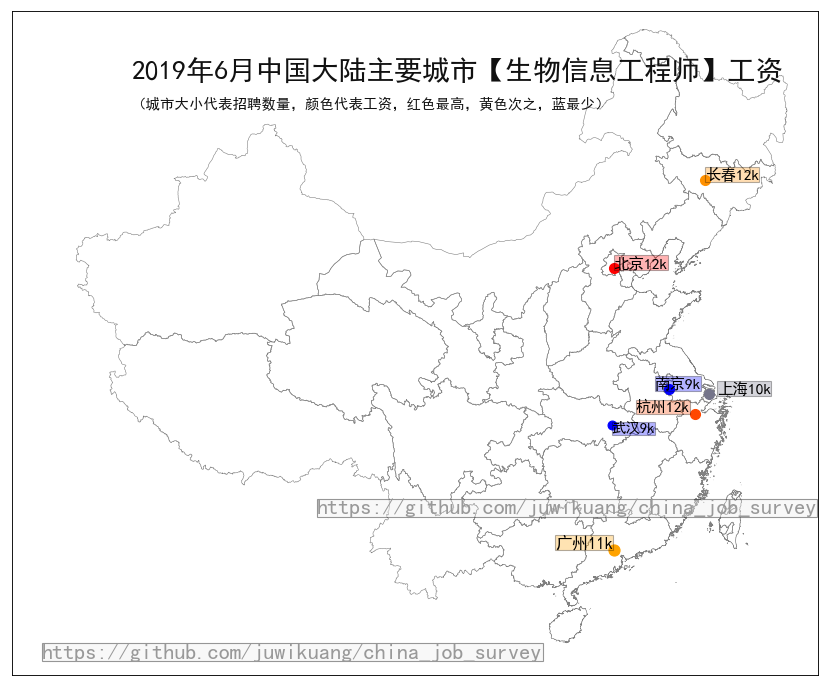

In [23]:
draw_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [24]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'city')
data_spider=data_spider[data_spider.head_count>10]
data_spider.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
6,北京,17153,1750,15000,37167,36,10.50%
1,广州,15846,2500,12357,37500,39,11.37%
12,南京,14969,12500,12833,20000,16,4.66%
3,上海,14409,3825,12714,31062,82,23.91%
9,杭州,12062,3750,12083,22500,20,5.83%
2,深圳,11213,5250,10499,24938,61,17.78%
7,长沙,11088,9000,11500,17500,17,4.96%
13,青岛,10471,8000,11143,12000,17,4.96%
5,成都,6737,2250,5812,14000,19,5.54%
8,郑州,5803,5000,5250,9000,19,5.54%


In [25]:
describe(data_spider, '爬虫工程师')

2019年6月北京招收爬虫工程师36人。2019年6月北京爬虫工程师平均工资17153元，工资中位数15000元，其中95%的人的工资介于1750元到37167元。

2019年6月广州招收爬虫工程师39人。2019年6月广州爬虫工程师平均工资15846元，工资中位数12357元，其中95%的人的工资介于2500元到37500元。

2019年6月南京招收爬虫工程师16人。2019年6月南京爬虫工程师平均工资14969元，工资中位数12833元，其中95%的人的工资介于12500元到20000元。

2019年6月上海招收爬虫工程师82人。2019年6月上海爬虫工程师平均工资14409元，工资中位数12714元，其中95%的人的工资介于3825元到31062元。

2019年6月杭州招收爬虫工程师20人。2019年6月杭州爬虫工程师平均工资12062元，工资中位数12083元，其中95%的人的工资介于3750元到22500元。

2019年6月深圳招收爬虫工程师61人。2019年6月深圳爬虫工程师平均工资11213元，工资中位数10499元，其中95%的人的工资介于5250元到24938元。

2019年6月长沙招收爬虫工程师17人。2019年6月长沙爬虫工程师平均工资11088元，工资中位数11500元，其中95%的人的工资介于9000元到17500元。

2019年6月青岛招收爬虫工程师17人。2019年6月青岛爬虫工程师平均工资10471元，工资中位数11143元，其中95%的人的工资介于8000元到12000元。

2019年6月成都招收爬虫工程师19人。2019年6月成都爬虫工程师平均工资6737元，工资中位数5812元，其中95%的人的工资介于2250元到14000元。

2019年6月郑州招收爬虫工程师19人。2019年6月郑州爬虫工程师平均工资5803元，工资中位数5250元，其中95%的人的工资介于5000元到9000元。



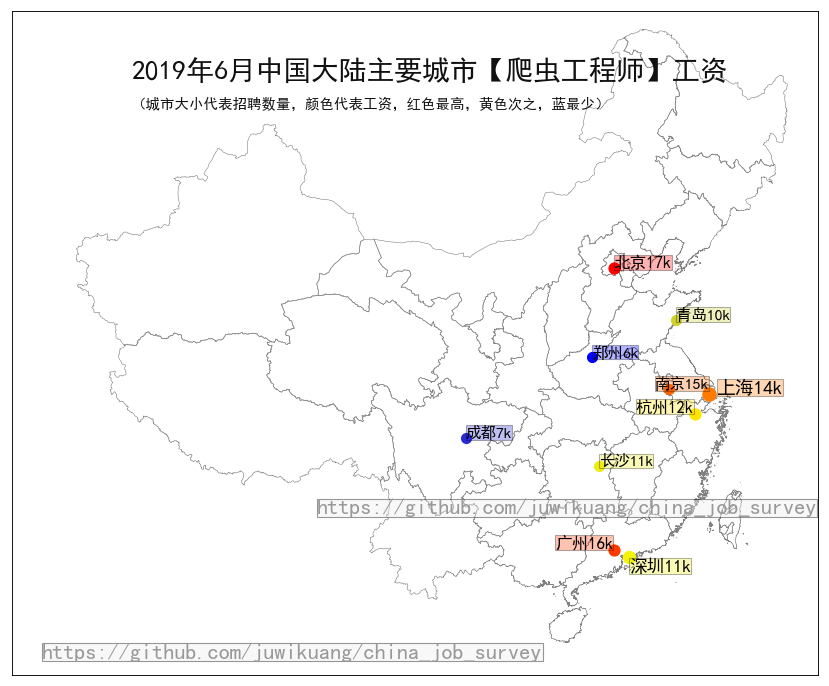

In [26]:
draw_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [27]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
4,上海,16808,5250,15000,37500,18821,17.48%
3,北京,16696,3750,14000,42688,11371,10.56%
7,深圳,16500,7000,15000,37500,14257,13.24%
1,杭州,15605,3750,14000,35000,6240,5.80%
2,广州,13407,3750,12500,30000,12919,12.00%
6,南京,12944,4105,12500,27083,7289,6.77%
17,东莞,12353,3119,12000,25525,858,0.80%
5,成都,11654,3000,11500,25000,4424,4.11%
0,武汉,11304,5000,10416,26000,5320,4.94%
9,西安,10724,3750,10000,22500,2877,2.67%


In [28]:
describe(data_java, 'Java程序员')

2019年6月上海招收Java程序员18821人。2019年6月上海Java程序员平均工资16808元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年6月北京招收Java程序员11371人。2019年6月北京Java程序员平均工资16696元，工资中位数14000元，其中95%的人的工资介于3750元到42688元。

2019年6月深圳招收Java程序员14257人。2019年6月深圳Java程序员平均工资16500元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2019年6月杭州招收Java程序员6240人。2019年6月杭州Java程序员平均工资15605元，工资中位数14000元，其中95%的人的工资介于3750元到35000元。

2019年6月广州招收Java程序员12919人。2019年6月广州Java程序员平均工资13407元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。

2019年6月南京招收Java程序员7289人。2019年6月南京Java程序员平均工资12944元，工资中位数12500元，其中95%的人的工资介于4105元到27083元。

2019年6月东莞招收Java程序员858人。2019年6月东莞Java程序员平均工资12353元，工资中位数12000元，其中95%的人的工资介于3119元到25525元。

2019年6月成都招收Java程序员4424人。2019年6月成都Java程序员平均工资11654元，工资中位数11500元，其中95%的人的工资介于3000元到25000元。

2019年6月武汉招收Java程序员5320人。2019年6月武汉Java程序员平均工资11304元，工资中位数10416元，其中95%的人的工资介于5000元到26000元。

2019年6月西安招收Java程序员2877人。2019年6月西安Java程序员平均工资10724元，工资中位数10000元，其中95%的人的工资介于3750元到22500元。

2019年6月宁波招收Java程序员1111人。2019年6月宁波Java程序员平均工资10482元，工资中位数10416元，其中95%的人的工资介于3000元到20833元。

2019年6月

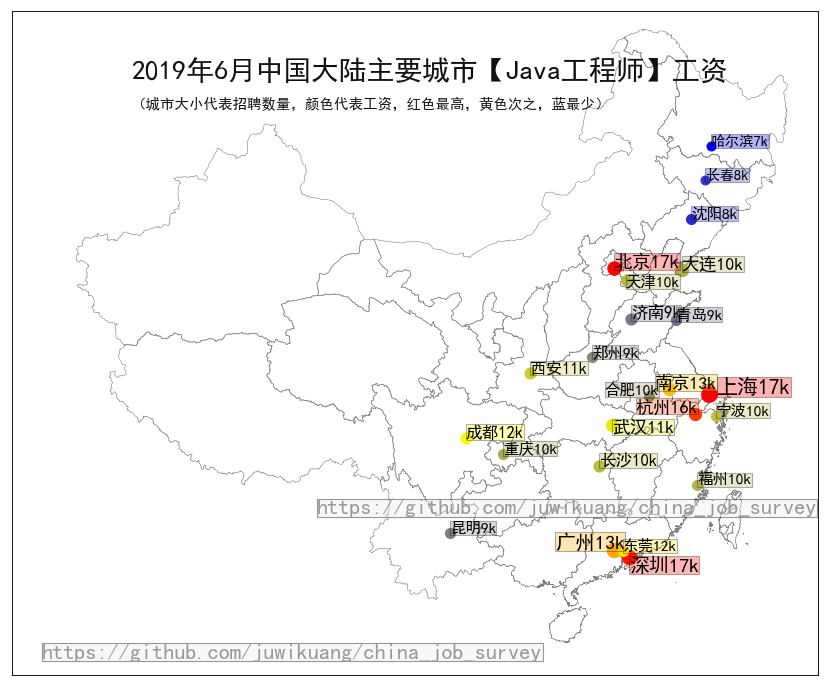

In [29]:
draw_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

# Python程序员

In [30]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'city')

data_python.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
8,北京,22542,3750,20000,55000,3987,15.70%
3,上海,21314,5411,20000,45833,5670,22.33%
5,深圳,20935,7000,17500,45000,3457,13.61%
2,杭州,17508,3396,15000,45000,1515,5.97%
0,广州,17107,3941,15000,40000,2667,10.50%
7,南京,15883,3209,15000,30804,1675,6.60%
10,天津,15692,6566,18120,22500,321,1.26%
9,成都,14835,4454,13500,32616,1129,4.45%
19,宁波,14770,3114,10416,56155,128,0.50%
1,武汉,14630,3829,12500,30696,1081,4.26%


In [31]:
describe(data_python, 'Python程序员')

2019年6月北京招收Python程序员3987人。2019年6月北京Python程序员平均工资22542元，工资中位数20000元，其中95%的人的工资介于3750元到55000元。

2019年6月上海招收Python程序员5670人。2019年6月上海Python程序员平均工资21314元，工资中位数20000元，其中95%的人的工资介于5411元到45833元。

2019年6月深圳招收Python程序员3457人。2019年6月深圳Python程序员平均工资20935元，工资中位数17500元，其中95%的人的工资介于7000元到45000元。

2019年6月杭州招收Python程序员1515人。2019年6月杭州Python程序员平均工资17508元，工资中位数15000元，其中95%的人的工资介于3396元到45000元。

2019年6月广州招收Python程序员2667人。2019年6月广州Python程序员平均工资17107元，工资中位数15000元，其中95%的人的工资介于3941元到40000元。

2019年6月南京招收Python程序员1675人。2019年6月南京Python程序员平均工资15883元，工资中位数15000元，其中95%的人的工资介于3209元到30804元。

2019年6月天津招收Python程序员321人。2019年6月天津Python程序员平均工资15692元，工资中位数18120元，其中95%的人的工资介于6566元到22500元。

2019年6月成都招收Python程序员1129人。2019年6月成都Python程序员平均工资14835元，工资中位数13500元，其中95%的人的工资介于4454元到32616元。

2019年6月宁波招收Python程序员128人。2019年6月宁波Python程序员平均工资14770元，工资中位数10416元，其中95%的人的工资介于3114元到56155元。

2019年6月武汉招收Python程序员1081人。2019年6月武汉Python程序员平均工资14630元，工资中位数12500元，其中95%的人的工资介于3829元到30696元。

2019年6月郑州招收Python程序员351人。2019年6月郑州Python程序员平均工资13673元，工资中位数130

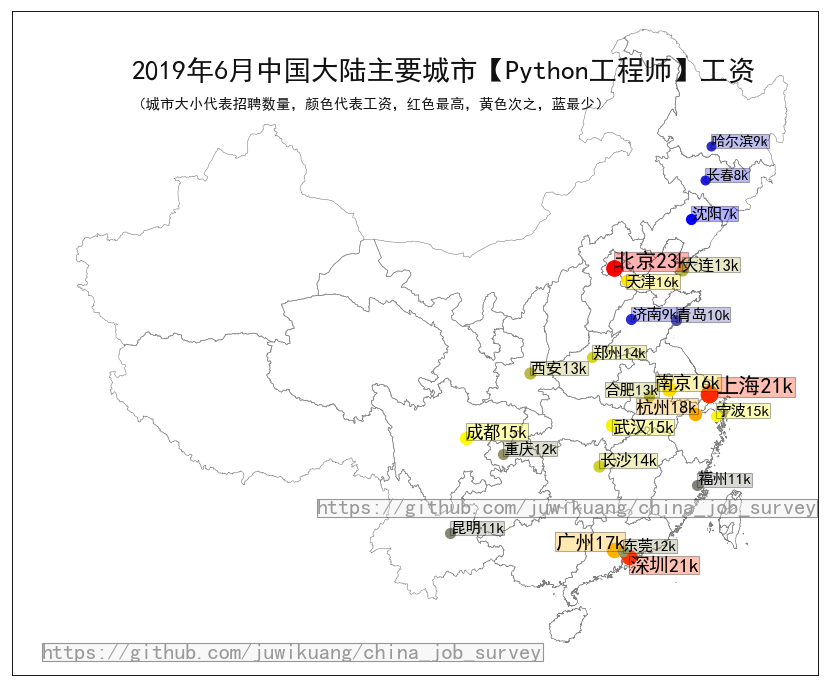

In [32]:
draw_map(data_python, 100,  f'{year}年{month}月中国大陆主要城市【Python工程师】工资')